In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns


In [2]:
# Read the dataset
df = pd.read_csv("Admission_Predict_Ver1.1.csv", usecols=[*range(1, 9)])

print("The shape of the dimensions of the data are {}".format(df.shape))
print("Describe the data")
df.describe()

The shape of the dimensions of the data are (500, 8)
Describe the data


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Plotting the data



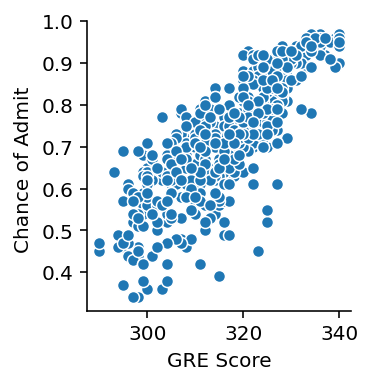

In [3]:
print("Plotting the data\n")

# df.plot(x='GRE Score', y=-1, style='o')
# plt.title('GRE scores to Chance of Admit')
# plt.xlabel('GREs')
# plt.ylabel('Chance of Admission')
# plt.show()
# plt.tight_layout()


# Plot GRE Score & Chance of Admit
sns.pairplot(data=df, height=2.5, y_vars=['Chance of Admit '],
                  x_vars=['GRE Score'])


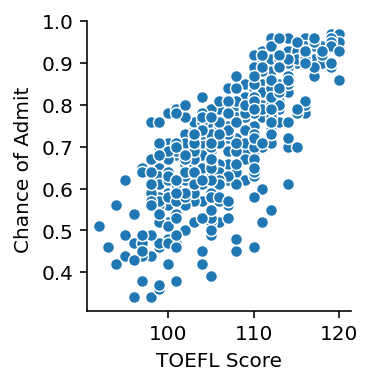

In [4]:
sns.pairplot(data=df, height=2.5, y_vars=['Chance of Admit '],
                  x_vars=['TOEFL Score'])


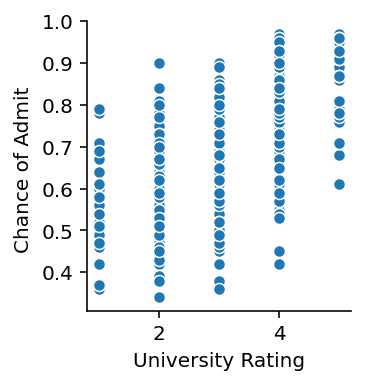

In [5]:
sns.pairplot(data=df, height=2.5, y_vars=['Chance of Admit '],
                  x_vars=['University Rating'])

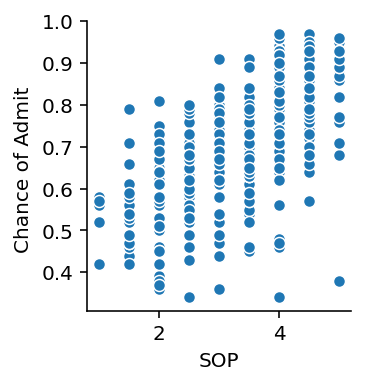

In [6]:
sns.pairplot(data=df, height=2.5, y_vars=['Chance of Admit '],
                  x_vars=['SOP'])

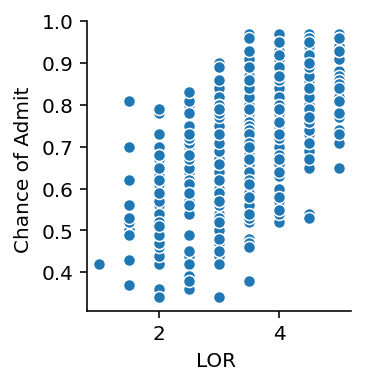

In [7]:
sns.pairplot(data=df, height=2.5, y_vars=['Chance of Admit '],
                  x_vars=['LOR '])

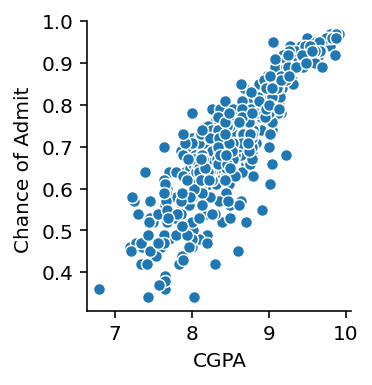

In [8]:
sns.pairplot(data=df, height=2.5, y_vars=['Chance of Admit '],
                  x_vars=['CGPA'])

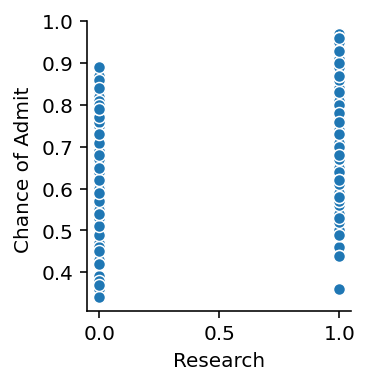

In [9]:
sns.pairplot(data=df, height=2.5, y_vars=['Chance of Admit '],
                  x_vars=['Research'])

In [10]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [11]:
from sklearn.model_selection import train_test_split 

## Split data

X = df.to_numpy()[:,:6]
y = df.to_numpy()[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=3)

print(X_test.shape)
y_test.shape

(75, 6)


(75,)

In [12]:
from sklearn.preprocessing import MinMaxScaler

## Scale the data

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
## Add bias

def add_bias(X):
    X_with_bias = np.c_[np.ones(X.shape[0]),X]
    return X_with_bias

# !!!!!**** Sklearn add its own bias column ****!!!!!
#X_train = add_bias(X_train)

In [14]:
## The Linear Regression Method
from sklearn.linear_model import LinearRegression

## Predict the likehood the candidate will get in (between 0.00 and 1.00)


lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.score(X_test,y_test)



0.8405837719024849

In [15]:
## The Logistic Regression Method
from sklearn.linear_model import LogisticRegression

## Reflect the Chance of Admit to classifying categories
yy_train = (y_train > 0.5)*2-1
yy_test = (y_test > 0.5)*2-1

## Predict whether the candidate can get in (Yes or No)
log_reg = LogisticRegression().fit(X_train, yy_train)
score_of_log_model = log_reg.score(X_test,yy_test)


In [16]:
print("The Logistic Model had a score of {}".format(log_reg.score(X_test,yy_test)))

print("The Linear Model had a score of {}".format(lin_reg.score(X_test,y_test)))

The Logistic Model had a score of 0.9466666666666667
The Linear Model had a score of 0.8405837719024849


In [17]:
## Determine the accuracy of the models

## Lin Reg Model
lin_reg_val_y_pred = lin_reg.predict(X_val)

# Print the predicted and actual value side by side
# for count in range(75):
#     print("The predicted value is: {}\nThe true value is: {}".format(lin_reg_val_y_pred[count], y_val[count]))

## Log Reg Model
yy_val = (y_val > 0.5)*2-1
log_reg.predict_proba(X_val)[:][:,1], yy_val[:]

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]),
 array([ 1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
         1,  1,  1,  1,  1,  1,  1]))

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

















NameError: name 'y_true' is not defined